In [4]:
import pandas as pd
df=pd.read_csv("Customers.csv") # Скачано с kaggle, апи попробовал, но решил оставить загрузку по умолчанию так как я храню данный csv в репо гитхаба с проектом
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## 2. Анализ данных

In [5]:
df.shape

(2000, 8)

In [7]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [8]:
df.nunique()

CustomerID                2000
Gender                       2
Age                        100
Annual Income ($)         1786
Spending Score (1-100)     101
Profession                   9
Work Experience             18
Family Size                  9
dtype: int64

<AxesSubplot:ylabel='Family Size'>

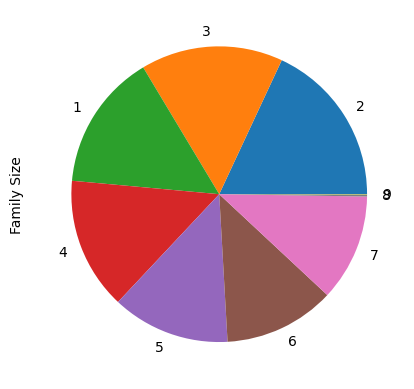

In [24]:
df['Family Size'].value_counts().plot.pie()

<AxesSubplot:>

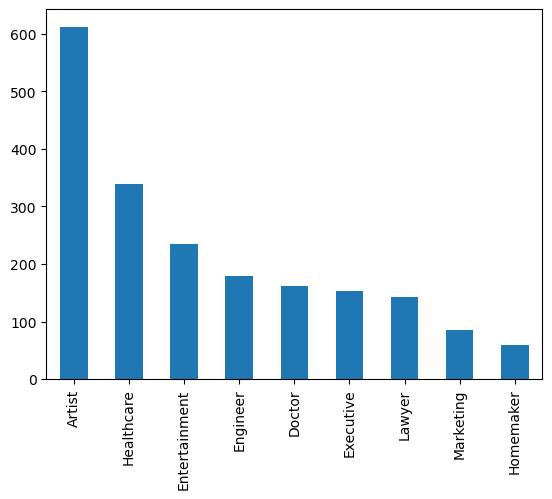

In [16]:
df['Profession'].value_counts().plot(kind='bar')

In [18]:
df_older_50 = df[df['Age'] > 50]
df_older_50.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
8,9,Male,64,97000,3,Engineer,0,3
10,11,Male,67,7000,14,Engineer,1,3
12,13,Female,58,80000,15,Executive,0,5
18,19,Male,52,20000,29,Entertainment,1,4
24,25,Female,54,67000,14,Executive,1,3


In [20]:
df_older_50.shape[0]

958

In [22]:
# Сколько человек старше 50
df[df['Age'] > 50].shape[0]

958

In [30]:
df.groupby('Annual Income ($)').agg('count')

,CustomerID,Gender,Age,Spending Score (1-100),Profession,Work Experience,Family Size
Annual Income ($),,,,,,,
0,2,2,2,2,2,2,2
1000,1,1,1,1,1,1,1
2000,2,2,2,2,2,2,2
3000,4,4,4,4,4,4,4
4000,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...
189672,1,1,1,1,1,1,1
189689,1,1,1,1,1,1,1
189709,1,1,1,1,1,1,1


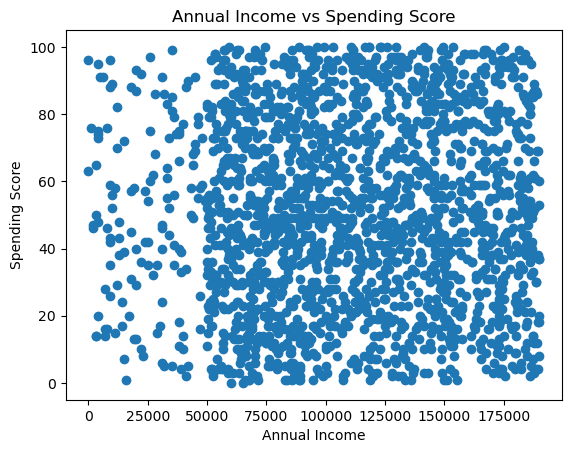

In [31]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income ($)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

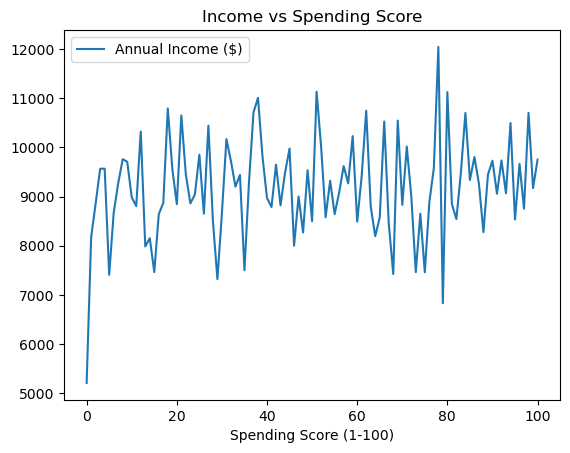

In [53]:
by_spendings = df.groupby('Spending Score (1-100)')
by_spendings['Annual Income ($)'].mean().divide(12).plot(y='Monthly Income', x='Spending score', title='Income vs Spending Score').legend()

## 3. Pandas_profile

In [55]:
from pandas_profiling import profile_report
profile_report.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

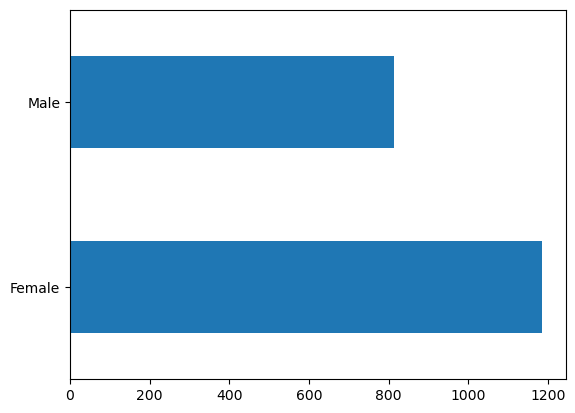

In [64]:
df['Gender'].value_counts().plot(kind='barh')

<AxesSubplot:>

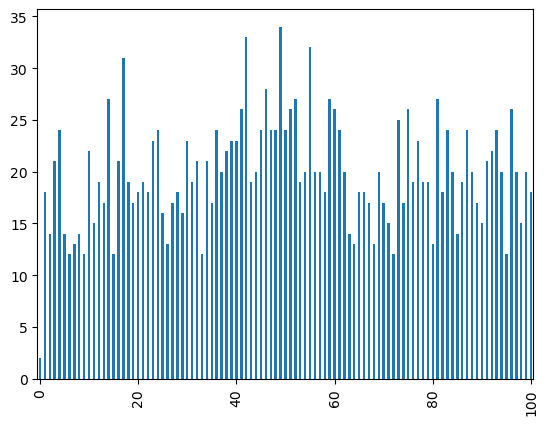

In [97]:
import numpy as np
min_value = df['Spending Score (1-100)'].min()
max_value = df['Spending Score (1-100)'].max()
xticks = np.linspace(min_value, max_value, 6, dtype=int)

df['Spending Score (1-100)'].value_counts().sort_index().plot(kind="bar", xticks=xticks)

<AxesSubplot:>

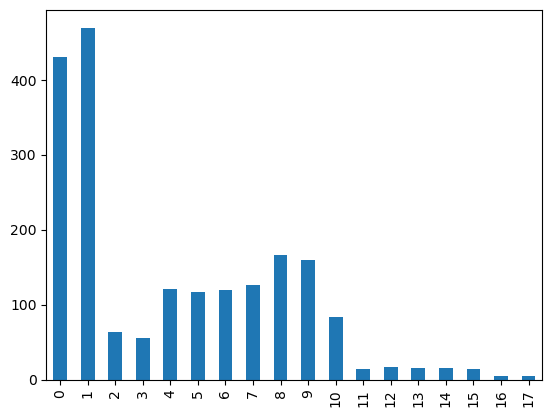

In [103]:
df['Work Experience'].value_counts().sort_index().plot(kind='bar')

In [99]:
df[df['Spending Score (1-100)'] == 100]['Spending Score (1-100)'].shape[0]

18

## 4. Визуализация пропущенных значений

<AxesSubplot:>

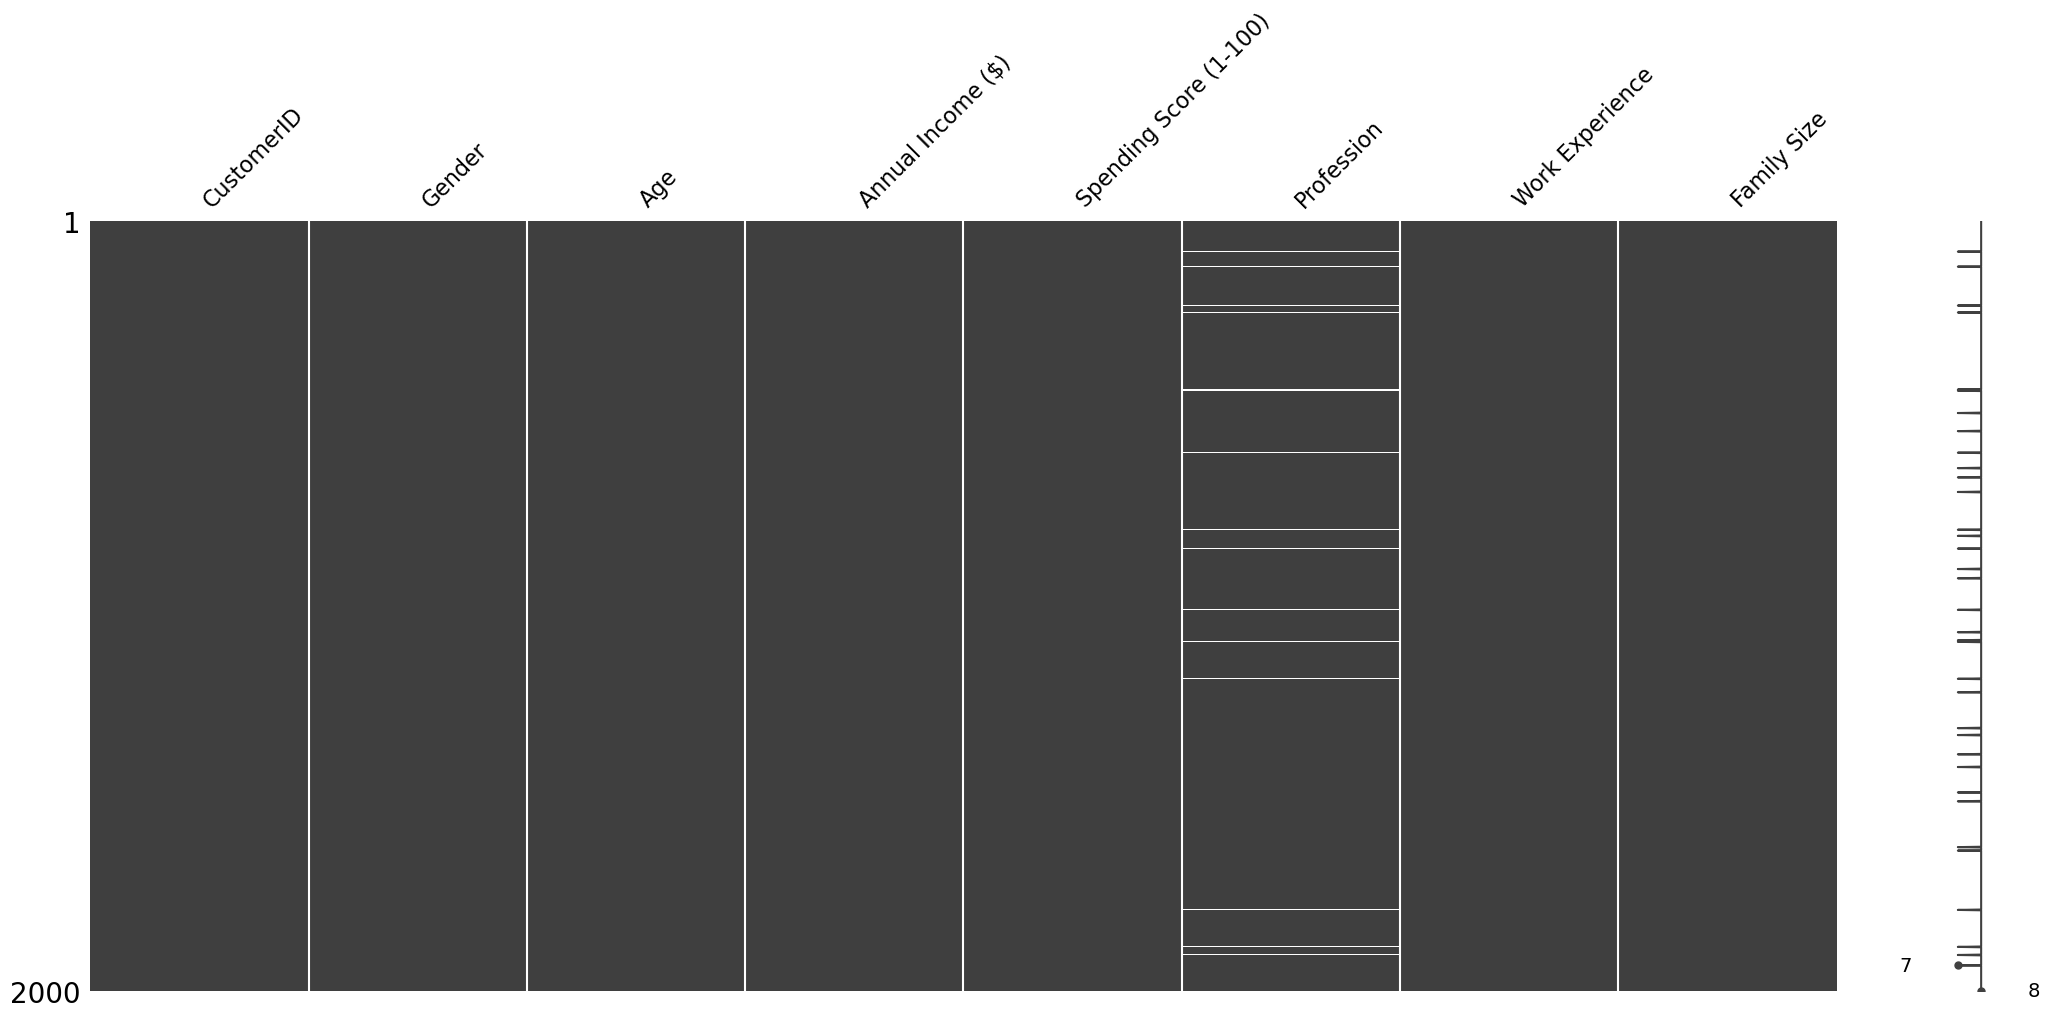

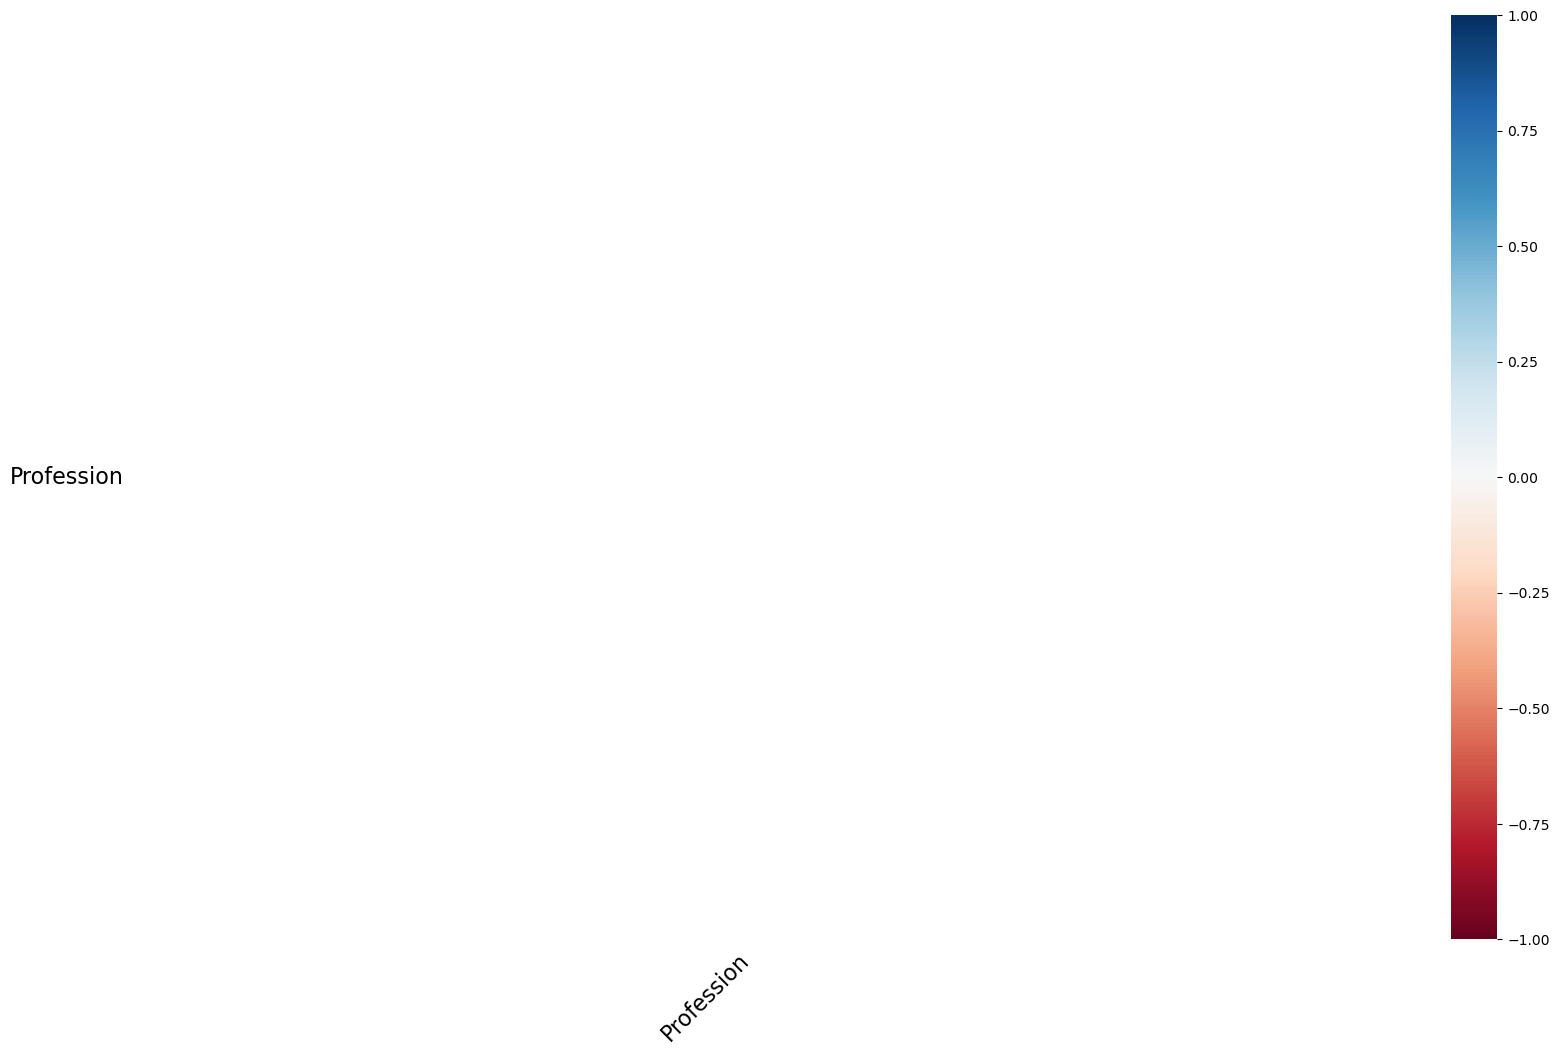

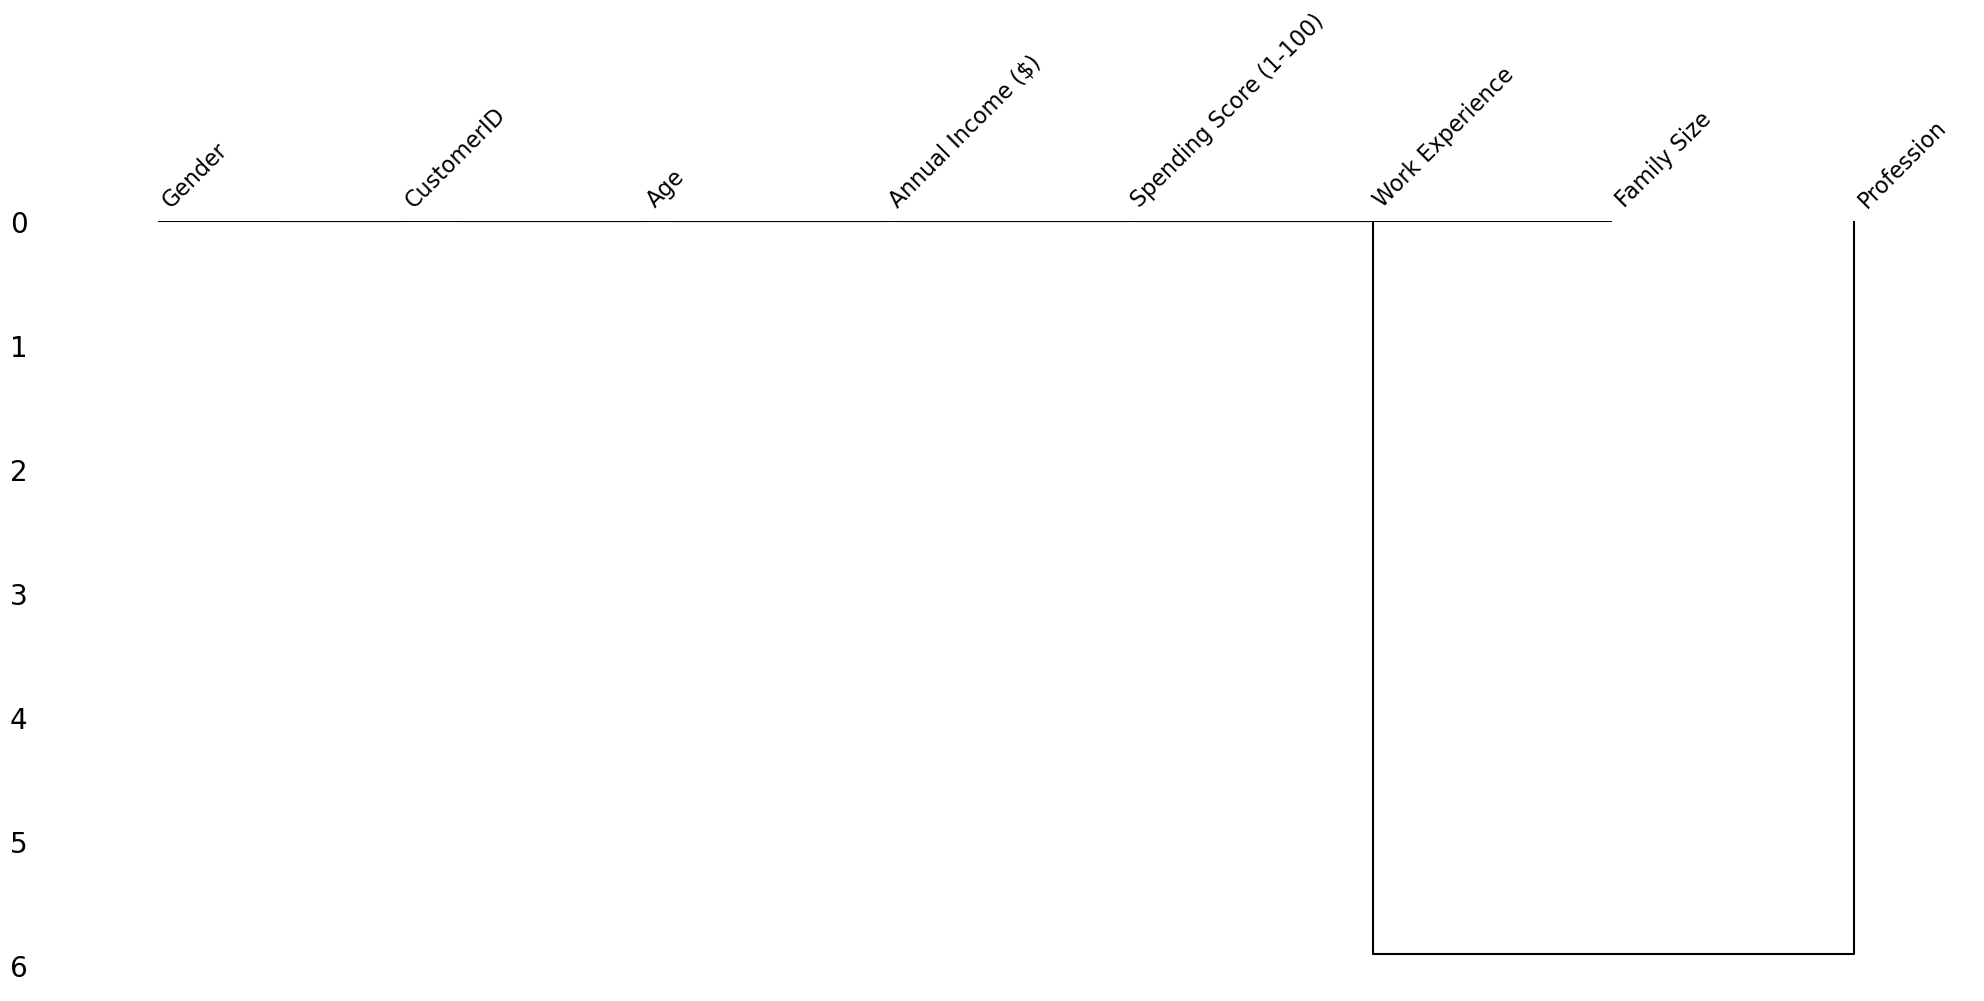

In [105]:
import missingno as msno

msno.matrix(df)
msno.heatmap(df)
msno.dendrogram(df)

## 5. Работа с пропусками

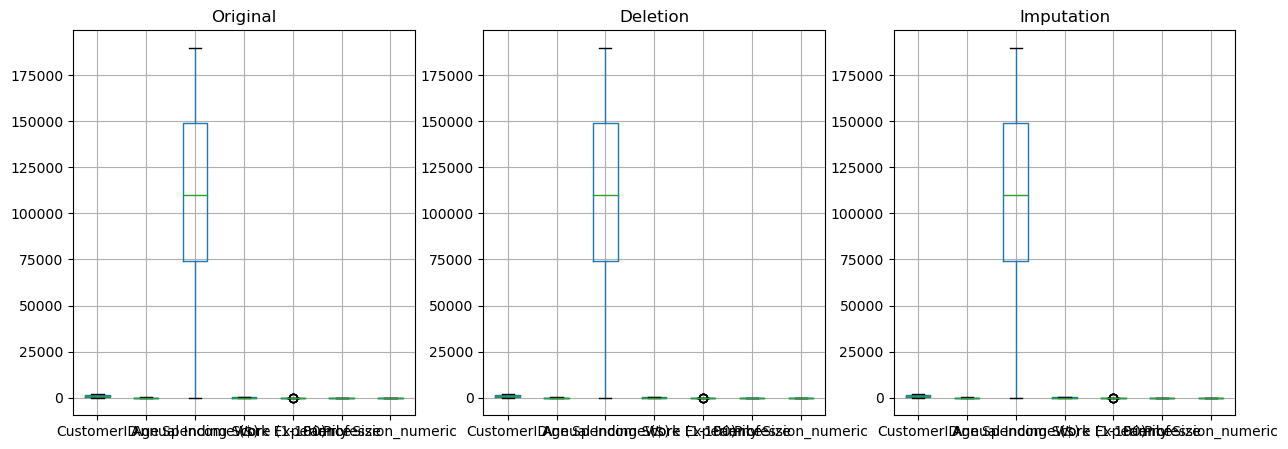

In [153]:
del_df = df.copy()
df.dropna(inplace=True)
inp_df = df.copy()
df.fillna(df['Profession'].mode()[0], inplace=True)

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# boxplot строит только из числового представления, поэтому строки переведем в числа исполльзуя энкодер
le = LabelEncoder()
df['Profession_numeric'] = le.fit_transform(df['Profession'])
del_df['Profession_numeric'] = le.fit_transform(del_df['Profession'])
inp_df['Profession_numeric'] = le.fit_transform(inp_df['Profession'])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
df.boxplot(ax=ax[0])
del_df.boxplot(ax=ax[1])
del_df.boxplot(ax=ax[2])

# Label the subplots
ax[0].set_title('Original')
ax[1].set_title('Deletion')
ax[2].set_title('Imputation')

# Show the plot
plt.show()

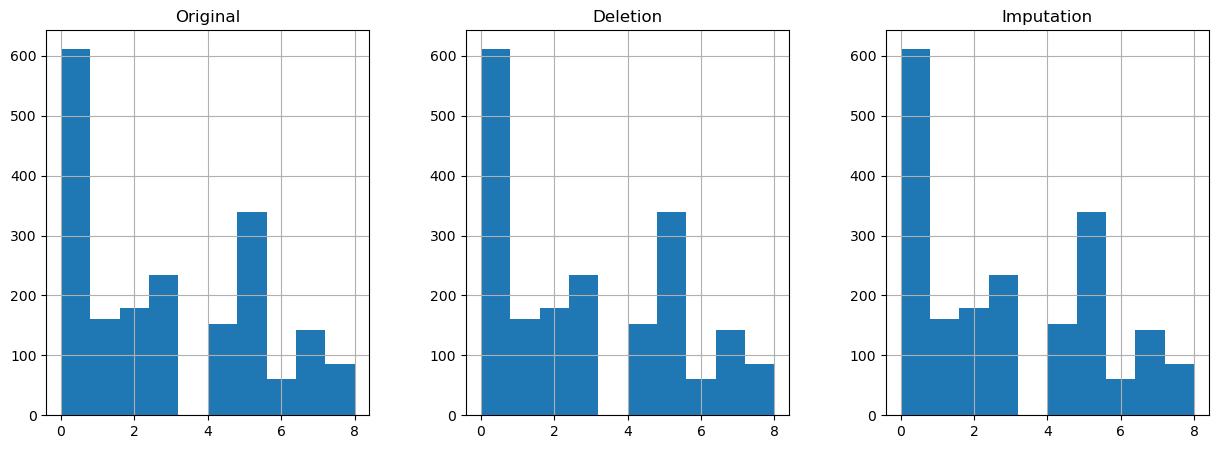

In [156]:
del fig
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
df.hist('Profession_numeric', ax=ax[0])
del_df.hist('Profession_numeric', ax=ax[1])
del_df.hist('Profession_numeric', ax=ax[2])

ax[0].set_title('Original')
ax[1].set_title('Deletion')
ax[2].set_title('Imputation')

plt.show()